<a href="https://colab.research.google.com/gist/RabiaZahid14/82ec4730cf789e23b65f47c75c63254b/pca_irisdataset_rabia_zahid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA, K-Means and DBSCAN Clustering on Iris DataSet

##Principal Component Analysis (PCA)
## Introduction

Principal Component Analysis (PCA) stands as a widely used technique for dimensionality reduction in data analysis and machine learning. It serves the purpose of identifying patterns and relationships within high-dimensional data by transforming the original features into a new set of orthogonal components known as principal components.

---



##Iris Data Set
- Classic dataset in machine learning and statistics.
- Contains 150 samples of iris flowers.
- Three species: setosa, versicolor, virginica.
- Each sample has four measured features: sepal length, sepal width, petal length, petal width.
- Used for classification, clustering, and dimensionality reduction tasks.






# Importing Necessary Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Loading and Preprocessing

First, the Iris dataset is loaded, followed by the execution of some fundamental preprocessing steps, such as standardizing the features.

In [ ]:
# Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# Standardizing the features
X_std = StandardScaler().fit_transform(X)

## PCA Transformation

After the data has been preprocessed, the PCA transformation will be performed to reduce the dimensionality of the feature space. The data will be projected onto a lower-dimensional subspace spanned by the principal components.


In [ ]:
# Performing PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [ ]:
# Converting to DataFrame for easier plotting
df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df['Target'] = y


## Visualization

The results of PCA will be visualized by plotting the data points in the reduced-dimensional space. This will aid in understanding the underlying structure of the Iris dataset and how the different classes are separated in the principal component space.


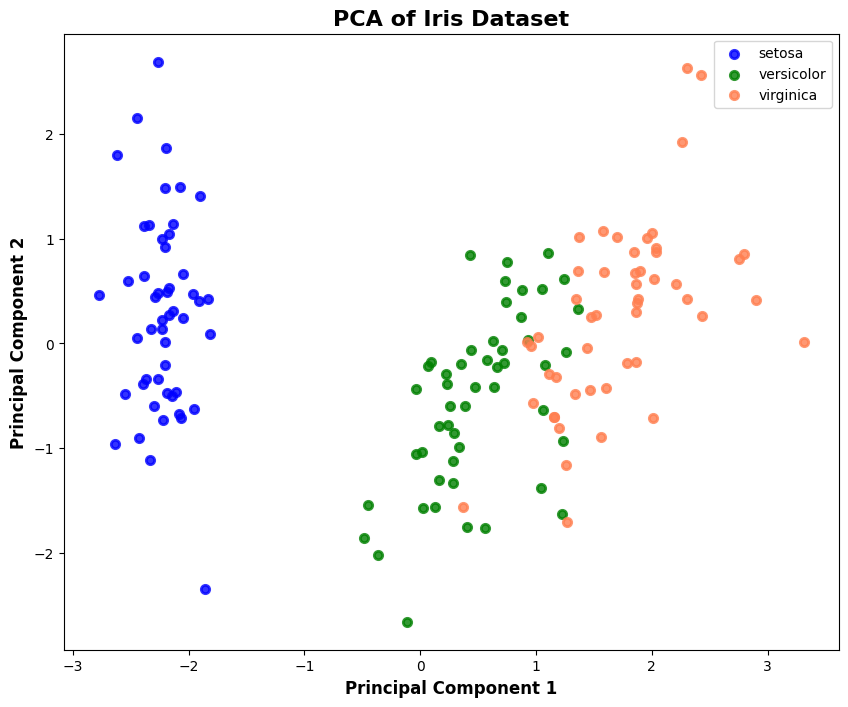

In [ ]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'coral']
lw = 2

# Plotting each class separately
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        df.loc[df['Target'] == i, 'Principal Component 1'],
        df.loc[df['Target'] == i, 'Principal Component 2'],
        color=color, alpha=.8, lw=lw, label=target_name
    )

# Adding legend and labels
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12, fontweight='bold')
plt.ylabel('Principal Component 2', fontsize=12, fontweight='bold')

# Showing the plot
plt.show()


PCA was applied to the Iris dataset, and the data was visualized in a lower-dimensional space. The principal components that capture the maximum variance in the data were identified, and the patterns and relationships between different classes of iris flowers were visualized. PCA emerges as a powerful technique for dimensionality reduction, applicable in various scenarios such as data visualization, feature extraction, and pattern recognition.


#K-means Clustering

K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into K distinct clusters.


*   Number of clusters (K): This is the most crucial parameter in K-means. It specifies the number of clusters the algorithm will partition the data into. Choosing an appropriate value for K is essential for obtaining meaningful clusters.

*   Initialization method: K-means requires initial centroids for each cluster. There are different initialization methods, such as random initialization, k-means++, or using predefined centroids. The choice of initialization method can affect the convergence and quality of the clustering results.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


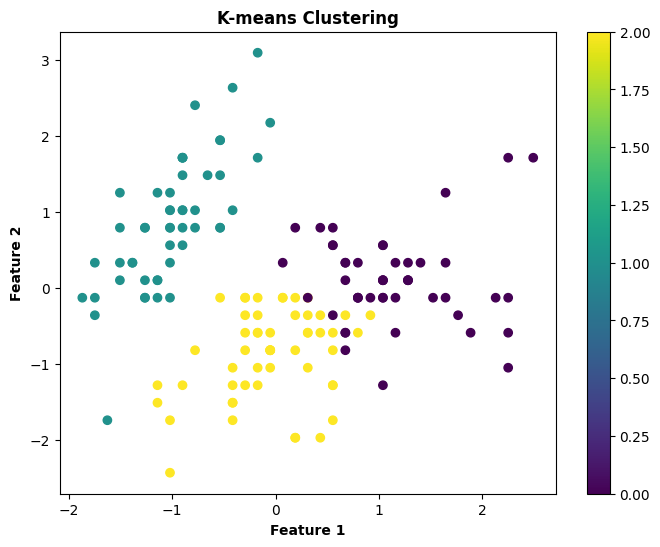

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)

# Plot K-means clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering',fontweight='bold')
plt.xlabel('Feature 1', fontweight='bold')
plt.ylabel('Feature 2',fontweight='bold')
plt.colorbar()
plt.show()



#DBSCAN Clustering
DBSCAN is a density-based clustering algorithm that groups together closely packed data points based on density.


*  Epsilon (ε): Also known as the neighborhood radius, epsilon defines the maximum distance between two points for them to be considered neighbors. It's a crucial parameter that determines the size of the neighborhood around each point.

*   Minimum points (MinPts): MinPts specifies the minimum number of points within the epsilon neighborhood of a point for it to be considered a core point. Points with fewer neighbors than MinPts are considered border points, and those with no neighbors are considered noise points.



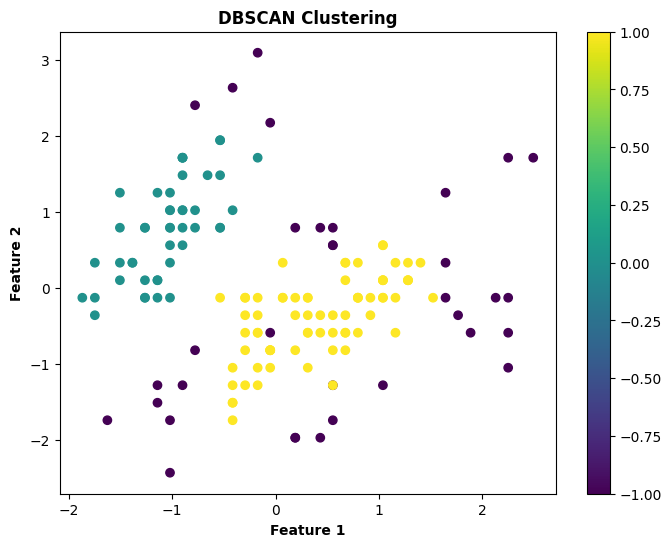

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_std)

# Plot DBSCAN clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering',fontweight='bold')
plt.xlabel('Feature 1',fontweight='bold')
plt.ylabel('Feature 2',fontweight='bold')
plt.colorbar()
plt.show()


# K-Means and DBSCAN clustering on the PCA transformed data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


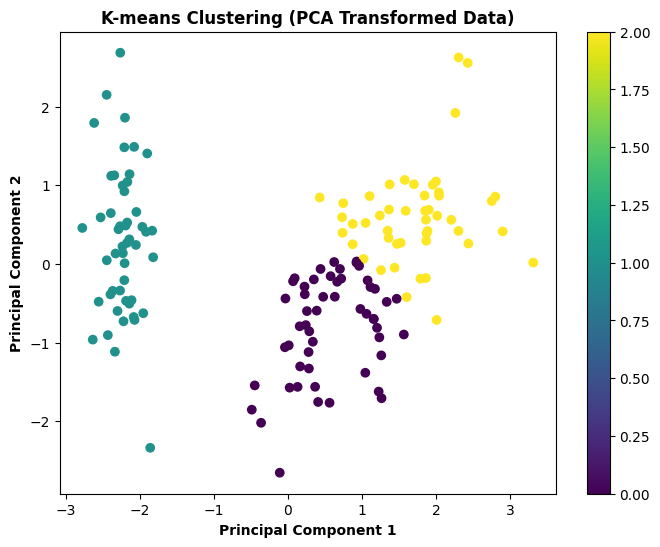

In [ ]:
# Perform K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

# Plot K-means clustering result on PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_labels, cmap='viridis')
plt.title('K-means Clustering (PCA Transformed Data)',fontweight='bold')
plt.xlabel('Principal Component 1',fontweight='bold')
plt.ylabel('Principal Component 2',fontweight='bold')
plt.colorbar()
plt.show()

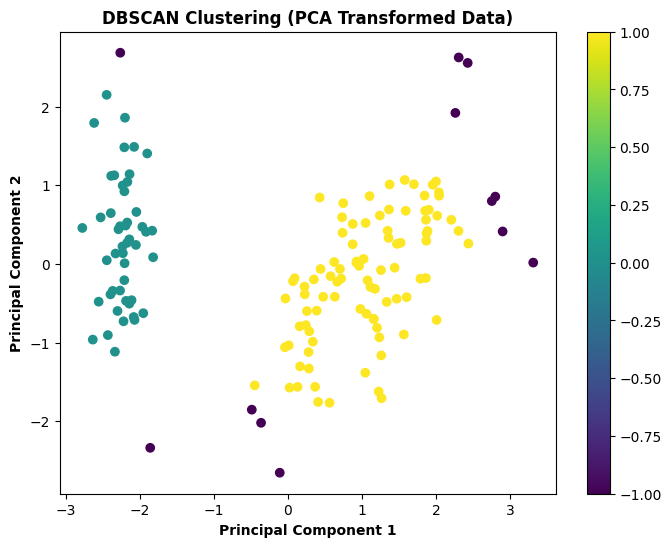

In [ ]:
# Perform DBSCAN clustering on PCA-transformed data
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_pca_labels = dbscan_pca.fit_predict(X_pca)

# Plot DBSCAN clustering result on PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_pca_labels, cmap='viridis')
plt.title('DBSCAN Clustering (PCA Transformed Data)',fontweight='bold')
plt.xlabel('Principal Component 1',fontweight='bold')
plt.ylabel('Principal Component 2',fontweight='bold')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# K-means clustering without PCA
silhouette_score_kmeans = silhouette_score(X_std, kmeans_labels)
print("Silhouette Score for K-means without PCA:", silhouette_score_kmeans)

# DBSCAN clustering without PCA
silhouette_score_dbscan = silhouette_score(X_std, dbscan_labels)
print("Silhouette Score for DBSCAN without PCA:", silhouette_score_dbscan)


Silhouette Score for K-means without PCA: 0.45994823920518635
Silhouette Score for DBSCAN without PCA: 0.35651648142700726


In [ ]:
# K-means clustering with PCA
silhouette_score_kmeans_pca = silhouette_score(X_pca, kmeans_pca_labels)
print("Silhouette Score for K-means with PCA:", silhouette_score_kmeans_pca)

# DBSCAN clustering with PCA
silhouette_score_dbscan_pca = silhouette_score(X_pca, dbscan_pca_labels)
print("Silhouette Score for DBSCAN with PCA:", silhouette_score_dbscan_pca)


Silhouette Score for K-means with PCA: 0.5091683341503112
Silhouette Score for DBSCAN with PCA: 0.5245307474132591
